In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=1000)

[2.28585792e-03 4.41964102e-04 2.28401134e-06 4.77417241e-07 1.50393686e-06 6.58316845e-10 1.02708708e-08 7.94955710e-08 1.11477538e-06 1.59627013e-08 9.80783698e-08 6.21789610e-07]


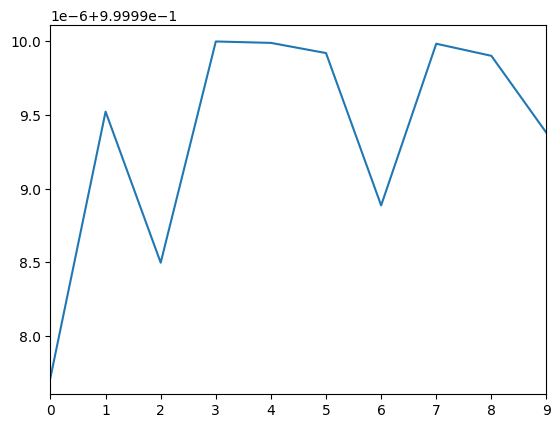

In [2]:
y = np.array([
    0.9977141420843406, 0.9995580358977452, 0.9999977159886605, 0.9999995225827586, 0.9999984960631365,
    0.9999999993416832, 0.9999999897291292, 0.999999920504429, 0.9999988852246199, 0.9999999840372987,
    0.9999999019216302, 0.9999993782103901
])
y = y[2:]
x = np.arange(len(y))
plt.xlim(0, len(y) - 1)
plt.plot(x, y)
plt.show()